In [209]:
import findspark
findspark.init()

import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import pandas.io.sql as psql
import seaborn as sns
import numpy as np
import pyspark
from pyspark.sql import SparkSession
import datetime as dt

In [210]:
spark = SparkSession.builder.master("local[1]").appName('Credit_card.com').getOrCreate()

In [211]:
connection = pymysql.connect(
    host='localhost',
    user='root',
    password='password',
    database='creditcard_capstone'
)

In [212]:
cursor = connection.cursor()

In [213]:
sql = "SELECT * FROM cdw_sapp_customer"
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_2160\1166130546.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [141]:
data_frame

,CREDIT_CARD_NO,CUST_CITY,CUST_COUNTRY,CUST_EMAIL,CUST_PHONE,CUST_STATE,CUST_ZIP,FIRST_NAME,LAST_NAME,LAST_UPDATED,MIDDLE_NAME,SSN,FULL_STREET_ADDRESS
0,4210653310061055,Natchez,United States,AHooper@example.com,(123) 781-8,MS,39120,Alec,Hooper,2018-04-21 12:49:02,wm,123456100,"656,Main Street North"
1,4210653310102868,Wethersfield,United States,EHolman@example.com,(123) 893-3,CT,6109,Etta,Holman,2018-04-21 12:49:02,brendan,123453023,"829,Redwood Drive"
2,4210653310116272,Huntley,United States,WDunham@example.com,(124) 301-8,IL,60142,Wilber,Dunham,2018-04-21 12:49:02,ezequiel,123454487,"683,12th Street East"
3,4210653310195948,NewBerlin,United States,EHardy@example.com,(124) 321-5,WI,53151,Eugenio,Hardy,2018-04-21 12:49:02,trina,123459758,"253,Country Club Road"
4,4210653310356919,ElPaso,United States,WAyers@example.com,(124) 207-4,TX,79930,Wilfred,Ayers,2018-04-21 12:49:02,may,123454431,"301,Madison Street"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,4210653399559239,SiouxCity,United States,FCastle@example.com,(123) 834-4,IA,51106,Freida,Castle,2018-04-21 12:49:02,jonah,123451589,"882,Main Street South"
948,4210653399650358,Summerville,United States,FBlock@example.com,(124) 042-0,SC,29483,Fern,Block,2018-04-21 12:49:02,aron,123457088,"470,Glenwood Avenue"
949,4210653399732638,Duluth,United States,DPruitt@example.com,(123) 614-9,GA,30096,Dylan,Pruitt,2018-04-21 12:49:02,lucas,123453259,"405,Country Lane"
950,4210653399859149,Rowlett,United States,EBeatty@example.com,(123) 688-6,TX,75088,Emery,Beatty,2018-04-21 12:49:02,susanna,123454047,"15,8th Street"


In [214]:
cursor.close()
connection.close()

In [215]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


Find and plot which state has a high number of customers.

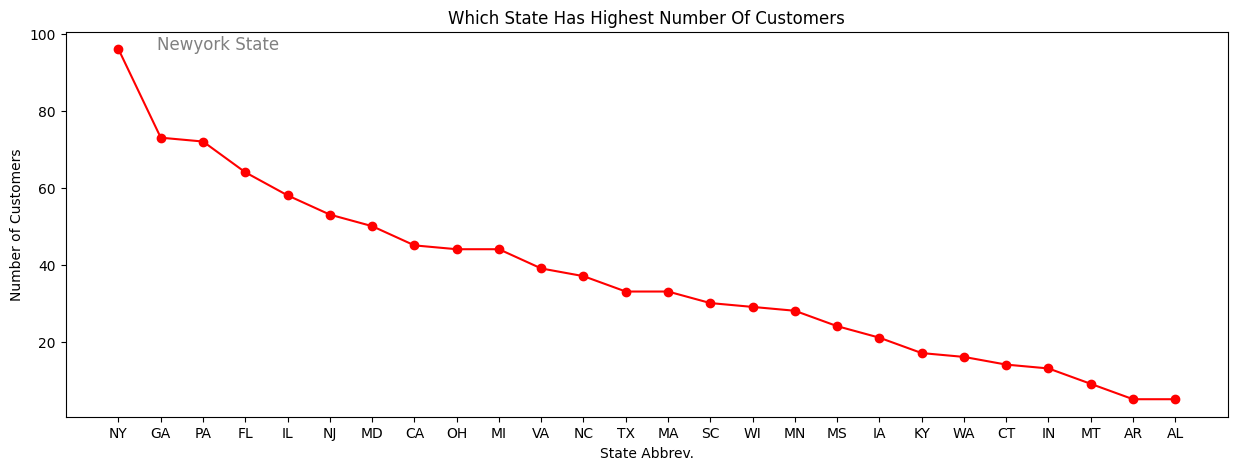

In [23]:
spark_df = spark_df.select('CUST_STATE')
pandas_df = spark_df.toPandas()
#pandas_df = pandas_df.sort_values(by='CUST_STATE',ascending=False)
#plt.bar(pandas_df['CUST_STATE'].value_counts())

plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = False
plt.plot(pandas_df['CUST_STATE'].value_counts(), ls='-', c='r', marker='o')
plt.title(' State With Highest Number Of Customers')
plt.ylabel('Number of Customers')

plt.xlabel('State')

plt.text(0.9, 95, 'Newyork State', fontsize = 12,
      color ='grey', ha ='left', va ='bottom',
         alpha = 1.0)
plt.show()

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_2160\709920819.py:6: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, color = 'grey',linestyle = '-.',linewidth=0.5,alpha=0.9)


Text(0.9, 0.15, 'NEWYORK STATE WITH HIGHEST NUMBER OF CUSTOMERS')

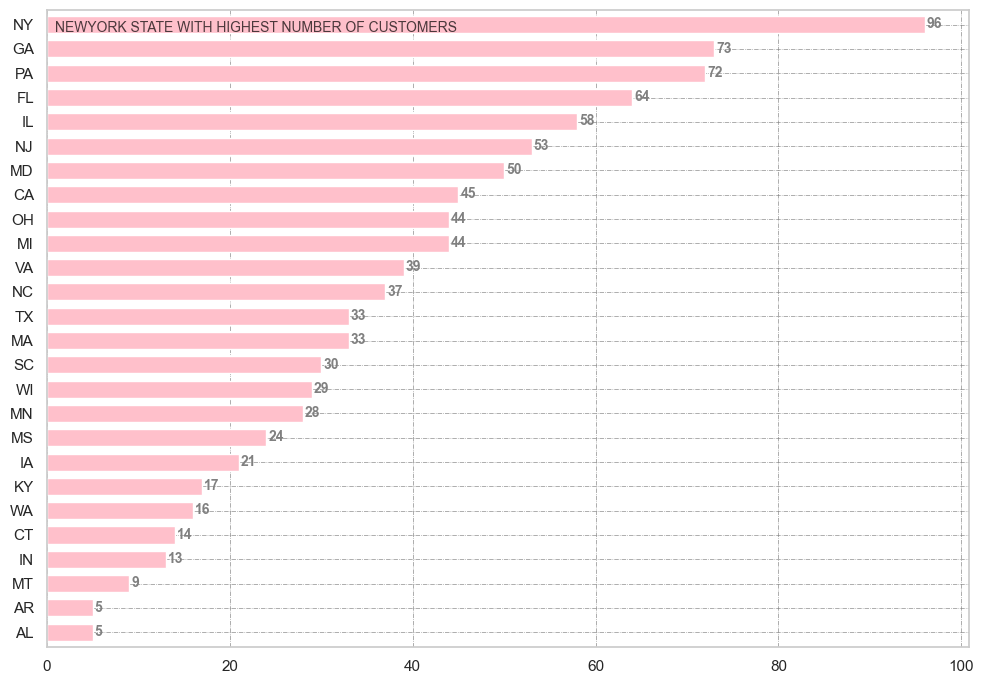

In [231]:
spark_df= spark_df.select("CUST_STATE")
pandas_df = spark_df.toPandas()
pandas_df = pandas_df['CUST_STATE'].value_counts()
ax=pandas_df.plot(kind="barh",rot=0, figsize=(10,7),width=0.7,
               color='pink')
ax.grid(b = True, color = 'grey',linestyle = '-.',linewidth=0.5,alpha=0.9)
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight = 'bold',
             color = 'grey')
plt.text(0.9,0.15,'NEWYORK STATE WITH HIGHEST NUMBER OF CUSTOMERS', fontsize=10,color = 'black', ha = 'left',va='center',alpha = 0.7)
    

Find and plot the sum of all transactions for the top 10 customers, and which customer has the highest transaction amount.
hint(use CUST_SSN). 

In [202]:
sql = "SELECT c.FIRST_NAME,c.LAST_NAME,c.MIDDLE_NAME,c.SSN,c.CUST_EMAIL,cc.CUST_SSN,cc.TRANSACTION_VALUE FROM cdw_sapp_customer c  JOIN cdw_sapp_credit_card cc ON c.SSN=cc.CUST_SSN "
cursor.execute(sql)
result_set = cursor.fetchall()
data_frame = psql.read_sql(sql, con=connection)
pd.set_option("display.max_columns", None)
#print(data_frame.head())

C:\Users\Learner_XZHCG225\AppData\Local\Temp\ipykernel_2160\876133078.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_frame = psql.read_sql(sql, con=connection)


In [203]:
spark_df = spark.createDataFrame(data_frame)

C:\Spark\python\pyspark\sql\pandas\conversion.py:371: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column, series in pdf.iteritems():


In [165]:
data_frame

,FIRST_NAME,LAST_NAME,MIDDLE_NAME,SSN,CUST_EMAIL,CUST_SSN,TRANSACTION_VALUE
0,Jennie,Russo,diane,123456698,JRusso@example.com,123456698,25.49
1,Jennie,Russo,diane,123456698,JRusso@example.com,123456698,47.08
2,Jennie,Russo,diane,123456698,JRusso@example.com,123456698,82.87
3,Jennie,Russo,diane,123456698,JRusso@example.com,123456698,65.46
4,Jennie,Russo,diane,123456698,JRusso@example.com,123456698,95.63
...,...,...,...,...,...,...,...
46689,Travis,Whitfield,kelsey,123452196,TWhitfield@example.com,123452196,96.18
46690,Travis,Whitfield,kelsey,123452196,TWhitfield@example.com,123452196,76.23
46691,Travis,Whitfield,kelsey,123452196,TWhitfield@example.com,123452196,39.10
46692,Travis,Whitfield,kelsey,123452196,TWhitfield@example.com,123452196,73.29


In [174]:
spark_df= spark_df.select('SSN', 'FIRST_NAME', 'LAST_NAME', 'TRANSACTION_VALUE')
pandas_df = spark_df.toPandas()
#print(pandas_df)
pandas_df = pandas_df.groupby('FIRST_NAME')['TRANSACTION_VALUE'].sum().reset_index()
print(pandas_df)
pandas_df = pandas_df.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
print(pandas_df)

pandas_df = pandas_df[:10]

    FIRST_NAME  TRANSACTION_VALUE
0         Abby            3271.94
1        Abdul            2748.71
2         Abel            1693.32
3         Adam            2129.52
4        Addie            8026.11
..         ...                ...
766      Young             563.80
767  Zachariah            2404.70
768    Zachery            3521.88
769    Zackary            3934.62
770      Zelma            3571.18

[771 rows x 2 columns]
    FIRST_NAME  TRANSACTION_VALUE
16      Alexis           15134.35
158   Courtney           11994.20
33      Amalia           11258.00
61     Aurelia            9462.95
733        Van            9414.12
..         ...                ...
57    Ashleigh              78.52
544      Nancy              73.08
132   Chadwick              61.67
250     Ernest              10.41
478      Lydia               2.15

[771 rows x 2 columns]


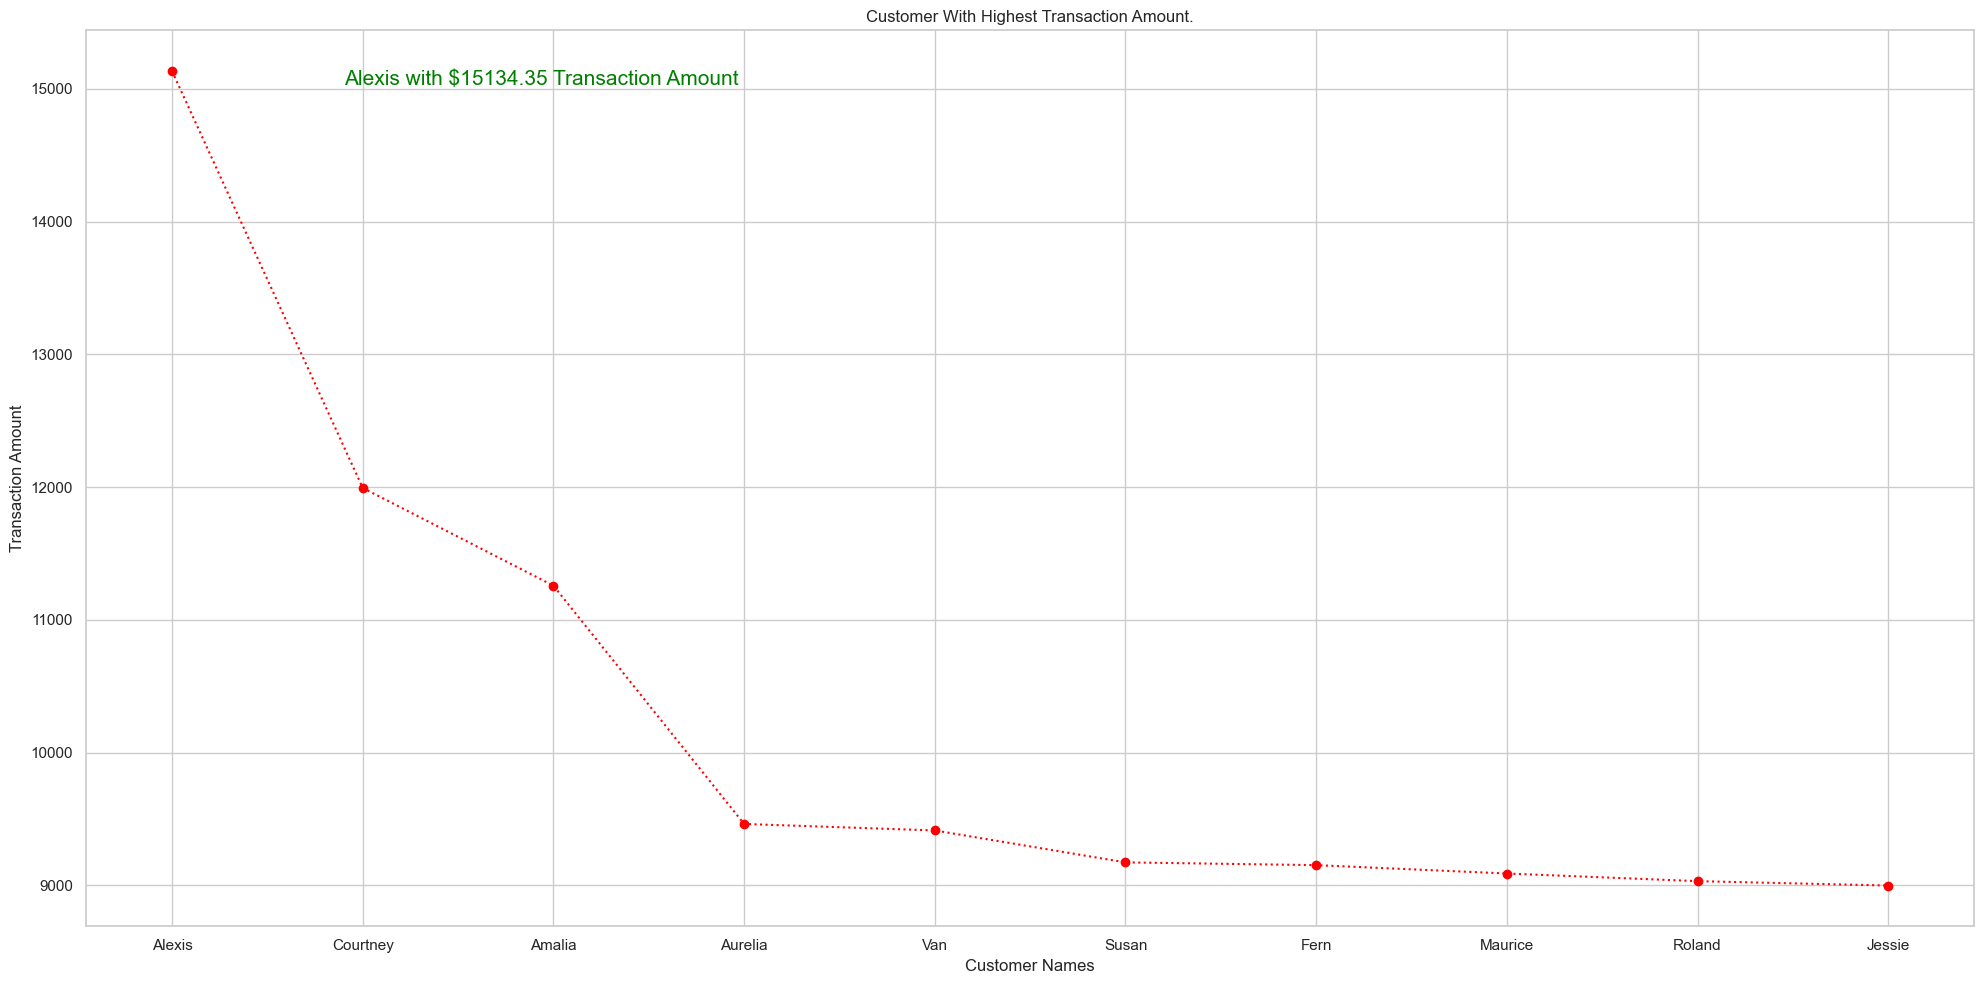

In [208]:
 
spark_df= spark_df.select('SSN', 'FIRST_NAME', 'LAST_NAME', 'TRANSACTION_VALUE')
pandas_df = spark_df.toPandas()
pandas_df = pandas_df.groupby('FIRST_NAME')['TRANSACTION_VALUE'].sum().reset_index()
pandas_df = pandas_df.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
pandas_df = pandas_df[:10]
plt.rcParams["figure.figsize"] = [20,10]
plt.rcParams["figure.autolayout"] = True
plt.plot(pandas_df['FIRST_NAME'], pandas_df['TRANSACTION_VALUE'], ls=':', c='red', marker='o')
plt.xticks(pandas_df['FIRST_NAME'])
plt.title('Customer With Highest Transaction Amount.')
plt.text(0.9,15000, 'Alexis with $15134.35 Transaction Amount', fontsize = 15,
      color ='green', ha ='left', va ='bottom',
         alpha = 1.0)
plt.ylabel('Transaction Amount')
plt.xlabel('Customer Names')

plt.show()

In [196]:
spark_df= spark_df.select('SSN', 'FIRST_NAME', 'LAST_NAME', 'TRANSACTION_VALUE')
pandas_df = spark_df.toPandas()
pandas_df = pandas_df.groupby('FIRST_NAME')['TRANSACTION_VALUE'].sum().reset_index()
pandas_df = pandas_df.sort_values(by=['TRANSACTION_VALUE'], ascending=False)
#pandas_df = pandas_df[:10]


In [ ]:


sns.set(rc={"figure.figsize":(4,6)})
sns.set_theme(style="whitegrid", palette="hls")
sns.barplot(x ='FIRST_NAME',
            y = 'TRANSACTION_VALUE',
            hue='TRANSACTION_VALUE',
            data = pandas_df).set(title ="Percentage of rejection for married male applicants." )